In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Starting two-body simulation...
Close the window to stop the simulation.


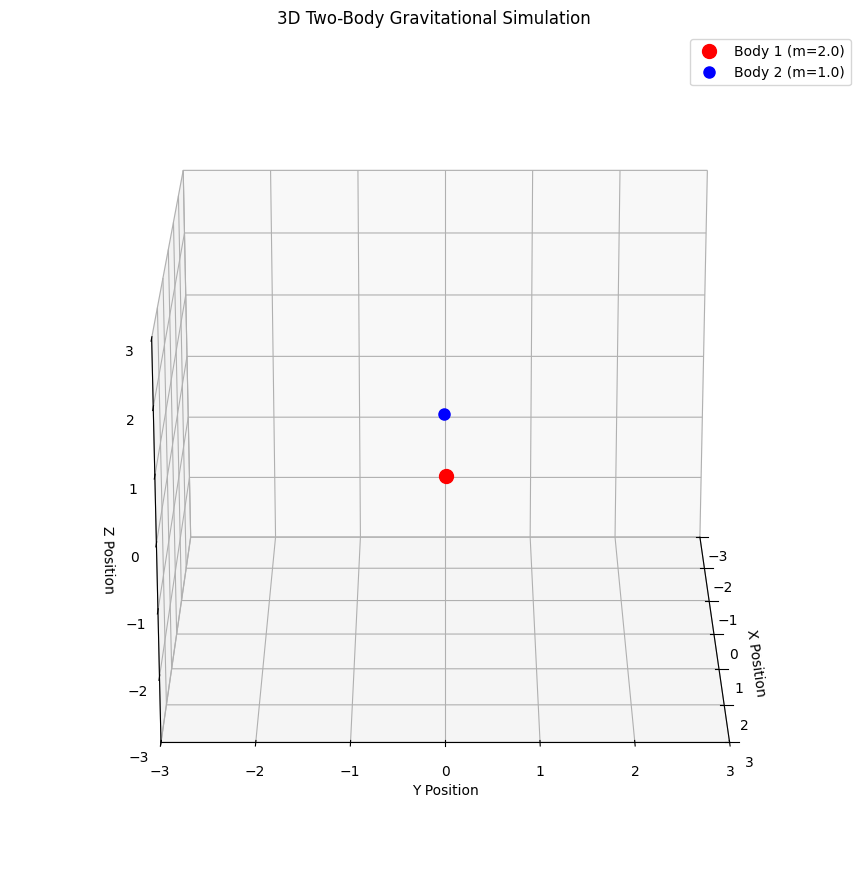

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class TwoBodySimulation:
    def __init__(self, m1=1.0, m2=1.0, G=1.0):
        """
        Initialize two-body simulation
        m1, m2: masses of the two bodies
        G: gravitational constant (scaled for convenience)
        """
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
        # Initial conditions - you can modify these!
        # Body 1: position and velocity (now 3D!)
        self.r1 = np.array([1.0, 0.0, 0.0])
        self.v1 = np.array([0.0, 0.5, 0.2])  # Added z-component
        
        # Body 2: position and velocity  
        self.r2 = np.array([-1.0, 0.0, 0.0])
        self.v2 = np.array([0.0, -0.5, -0.2])  # Added z-component
        
        # For plotting trails
        self.trail1 = [self.r1.copy()]
        self.trail2 = [self.r2.copy()]
        
        self.dt = 0.01  # time step
        
    def calculate_forces(self):
        """Calculate gravitational forces between the two bodies"""
        # Vector from body 1 to body 2
        r_vec = self.r2 - self.r1
        r_distance = np.linalg.norm(r_vec)
        
        # Avoid division by zero (collision)
        if r_distance < 0.01:
            r_distance = 0.01
            
        # Unit vector pointing from body 1 to body 2
        r_hat = r_vec / r_distance
        
        # Gravitational force magnitude
        F_magnitude = self.G * self.m1 * self.m2 / (r_distance**2)
        
        # Force on body 1 (toward body 2)
        F1 = F_magnitude * r_hat
        # Force on body 2 (toward body 1, Newton's 3rd law)
        F2 = -F1
        
        return F1, F2
    
    def update(self):
        """Update positions and velocities using Euler's method"""
        # Calculate forces
        F1, F2 = self.calculate_forces()
        
        # Calculate accelerations (F = ma)
        a1 = F1 / self.m1
        a2 = F2 / self.m2
        
        # Update velocities
        self.v1 += a1 * self.dt
        self.v2 += a2 * self.dt
        
        # Update positions
        self.r1 += self.v1 * self.dt
        self.r2 += self.v2 * self.dt
        
        # Store for trails (limit trail length for performance)
        self.trail1.append(self.r1.copy())
        self.trail2.append(self.r2.copy())
        if len(self.trail1) > 500:
            self.trail1.pop(0)
            self.trail2.pop(0)

def animate_simulation():
    """Create and run the animated 3D simulation"""
    # Create simulation instance
    sim = TwoBodySimulation(m1=2.0, m2=1.0)  # Try different mass ratios!
    
    # Set up 3D plot
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_title('3D Two-Body Gravitational Simulation')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    
    # Create plot elements
    body1, = ax.plot([], [], [], 'ro', markersize=10, label=f'Body 1 (m={sim.m1})')
    body2, = ax.plot([], [], [], 'bo', markersize=8, label=f'Body 2 (m={sim.m2})')
    trail1, = ax.plot([], [], [], 'r-', alpha=0.6, linewidth=2)
    trail2, = ax.plot([], [], [], 'b-', alpha=0.6, linewidth=1)
    
    ax.legend()
    
    def animate(frame):
        # Update simulation
        sim.update()
        
        # Update plot data (now with Z coordinates!)
        body1.set_data_3d([sim.r1[0]], [sim.r1[1]], [sim.r1[2]])
        body2.set_data_3d([sim.r2[0]], [sim.r2[1]], [sim.r2[2]])
        
        # Update trails
        if len(sim.trail1) > 1:
            trail1_x = [pos[0] for pos in sim.trail1]
            trail1_y = [pos[1] for pos in sim.trail1]
            trail1_z = [pos[2] for pos in sim.trail1]
            trail1.set_data_3d(trail1_x, trail1_y, trail1_z)
            
            trail2_x = [pos[0] for pos in sim.trail2]
            trail2_y = [pos[1] for pos in sim.trail2]
            trail2_z = [pos[2] for pos in sim.trail2]
            trail2.set_data_3d(trail2_x, trail2_y, trail2_z)
        
        # Rotate view for better 3D perspective
        ax.view_init(elev=20, azim=frame*0.5)
        
        return body1, body2, trail1, trail2
    
    # Create animation
    anim = animation.FuncAnimation(fig, animate, interval=20, blit=True, cache_frame_data=False)
    
    # Show the animation
    plt.tight_layout()
    plt.show()
    
    return anim

# Run the simulation
if __name__ == "__main__":
    print("Starting two-body simulation...")
    print("Close the window to stop the simulation.")
    
    # Run the animation
    anim = animate_simulation()
    
    # Keep reference to animation to prevent garbage collection
    # (only needed in some environments)
    plt.show()